# PySCENIC workflow - results 

overall 12 runs

get results as csv, for readibility 

In [15]:
from glob import glob
from os.path import basename, normpath
import pandas as pd
import pickle

In [16]:
for folder in glob("../results/*/"):  # get a list of all sub directories
    with open(folder+'regulons.pkl', 'rb') as f: 
        regulon = pickle.load(f)
    # run = basename(normpath(folder))
    # print(run)
        # get regulon results from pkl file to df and save as csv - for readability
        reg_df = pd.DataFrame({
            'TF': [reg.transcription_factor for reg in regulon],
            'genes': [list(reg.genes) for reg in regulon],
            'score': [reg.score for reg in regulon]
        })
        reg_df['size'] = reg_df['genes'].apply(lambda x: len(x))
        reg_df = reg_df.set_index('TF')
        reg_df.to_csv(folder + 'regulons.csv')

list of all regulons TFs and their frequency in the results

In [2]:
from collections import Counter

In [17]:
tfs_counter = Counter()
for folder in glob('../results/*/'):
    regulons_df = pd.read_csv(folder+'regulons.csv', index_col=0)
    tfs_counter.update(regulons_df.index)  # count appearance on TFs between different runs (overall 12 runs)

In [18]:
tfs_counter

Counter({'Abd-B': 2,
         'CG11586': 9,
         'CG12071': 1,
         'CG17829': 9,
         'CG2790': 1,
         'CG30020': 4,
         'CG33557': 2,
         'CG5245': 11,
         'CG5846': 11,
         'CG7839': 3,
         'CG9727': 5,
         'CR43670': 1,
         'Cf2': 9,
         'Chrac-14': 2,
         'Cnx99A': 2,
         'Dp': 12,
         'Dref': 4,
         'E(spl)m3-HLH': 12,
         'E(spl)m5-HLH': 12,
         'E(spl)m7-HLH': 12,
         'E(spl)mbeta-HLH': 12,
         'E(spl)mdelta-HLH': 9,
         'E2f1': 12,
         'E2f2': 12,
         'EcR': 6,
         'Ets21C': 3,
         'Ets97D': 6,
         'FoxK': 10,
         'GATAe': 7,
         'HLH54F': 12,
         'Hnf4': 6,
         'Jra': 8,
         'Lmx1a': 3,
         'Mef2': 12,
         'Met': 7,
         'Mitf': 9,
         'Mondo': 3,
         'Myb': 4,
         'Myc': 12,
         'Pdp1': 7,
         'Poxm': 6,
         'Ptx1': 11,
         'Rab14': 3,
         'Rbf2': 6,
         'Rel': 12,
  

## TFs counts distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


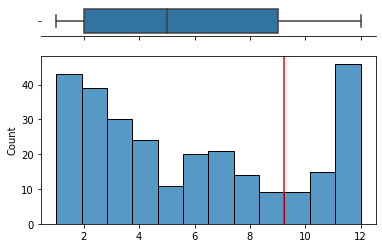

In [40]:
tfs_freq = pd.Series(tfs_counter)
tfs_freq = tfs_freq.sort_values(ascending=False)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(tfs_freq, ax=ax_box)
sns.histplot(tfs_freq, ax=ax_hist, bins=12)
sns.despine(ax=ax_box, left=True)
plt.axvline(9.25, color='red')

Produce list of TFs that appear in >80% of the runs

In [20]:
tfs_80 = tfs_freq[tfs_freq > 9]  # 9/12 ~ 80%

In [21]:
tfs_80  # overall 70 TFs regukons that appear in over 80% (=9) of the runs

Mef2       12
zld        12
gcm        12
foxo       12
emc        12
           ..
Stat92E    10
sc         10
jigr1      10
FoxK       10
SoxN       10
Length: 70, dtype: int64

## How genes differ between runs in the same TF regulon?

for each run - save a regulon sub-matrix with the TFs that appear in >80% of the runs.

In [22]:
for folder in glob('../results/*/'):
    regulons_df = pd.read_csv(folder+'regulons.csv', index_col=0)
    regulons_top_freq = regulons_df.loc[[tf for tf in regulons_df.index if tf in tfs_80.index]]  # save regulons of the best confidence TFs (>80%)
    regulons_top_freq.to_csv(folder + 'regulons_top80.csv')

calculate gene frequency for the same regulon (TF)

In [25]:
from ast import literal_eval
import os

In [26]:
all_dfs = pd.concat([pd.read_csv(folder + 'regulons_top80.csv', index_col=0) for folder in glob("../results/*/")])
all_dfs_genes = all_dfs['genes']  # keep only genes column, discard size of regulon and score
all_dfs_genes = all_dfs_genes.apply(literal_eval) # convert string to list
all_dfs_genes = all_dfs_genes.explode()
all_dfs_genes = pd.DataFrame(all_dfs_genes).rename({'genes': 'gene'}, axis='columns')
gene_counts = all_dfs_genes.groupby(['TF', 'gene']).size().to_frame('count')
gene_counts.to_csv("../results/gene_counts.csv")

gene_counts = gene_counts.reset_index()
gene_counts

TF     gene  count
0     CG5245     BuGZ      1
1     CG5245  CDK2AP1      2
2     CG5245  CG11409      1
3     CG5245  CG13920      1
4     CG5245  CG15382      2
...      ...      ...    ...
7043     zld      vnd      1
7044     zld      wdb      1
7045     zld     wech      4
7046     zld      zip      1
7047     zld      zld     12

[7048 rows x 3 columns]

plot gene counts histogram + boxplot

In [321]:
len(gene_counts.gene.unique())

3049

In [320]:
gene_counts

TF     gene  count
0     CG5245     BuGZ      1
1     CG5245  CDK2AP1      2
2     CG5245  CG11409      1
3     CG5245  CG13920      1
4     CG5245  CG15382      2
...      ...      ...    ...
7043     zld      vnd      1
7044     zld      wdb      1
7045     zld     wech      4
7046     zld      zip      1
7047     zld      zld     12

[7048 rows x 3 columns]

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


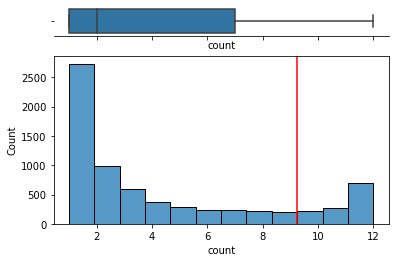

In [39]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(gene_counts['count'], ax=ax_box)
sns.histplot(gene_counts['count'], ax=ax_hist, bins=12)
sns.despine(ax=ax_box, left=True)
plt.axvline(9.25, color='red')

## Heatmaps for  top TFs per run (AUCell)

upload cell types annotation

In [41]:
types_df = pd.read_csv("../data/cell_type.csv", index_col=0)

In [ ]:
types_df

create and save heatmaps as png

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: User

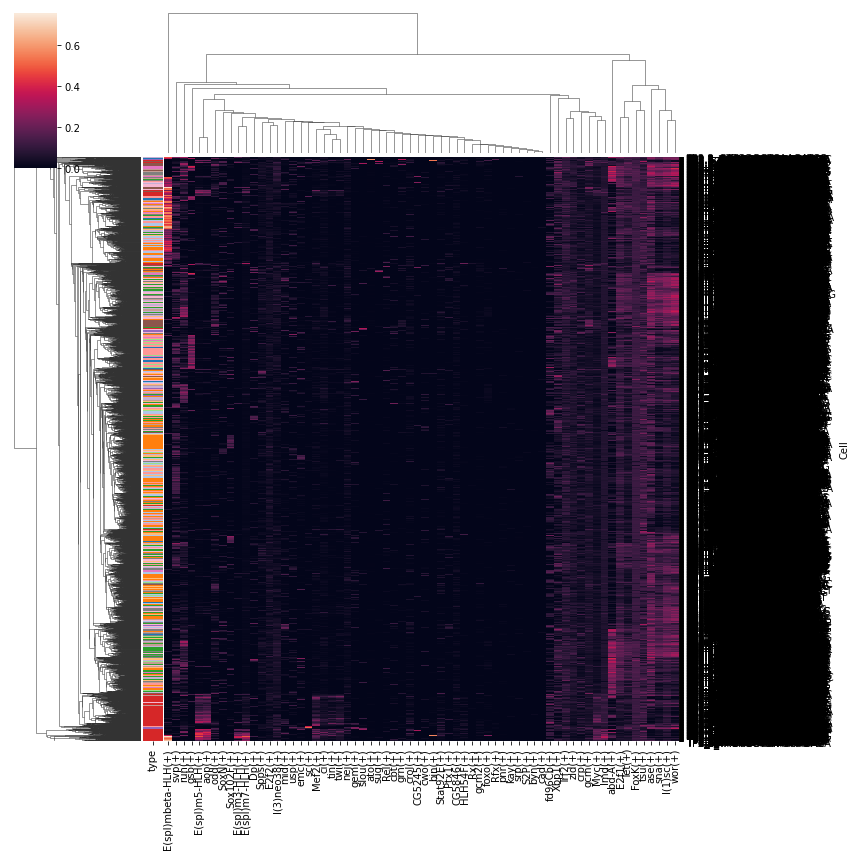

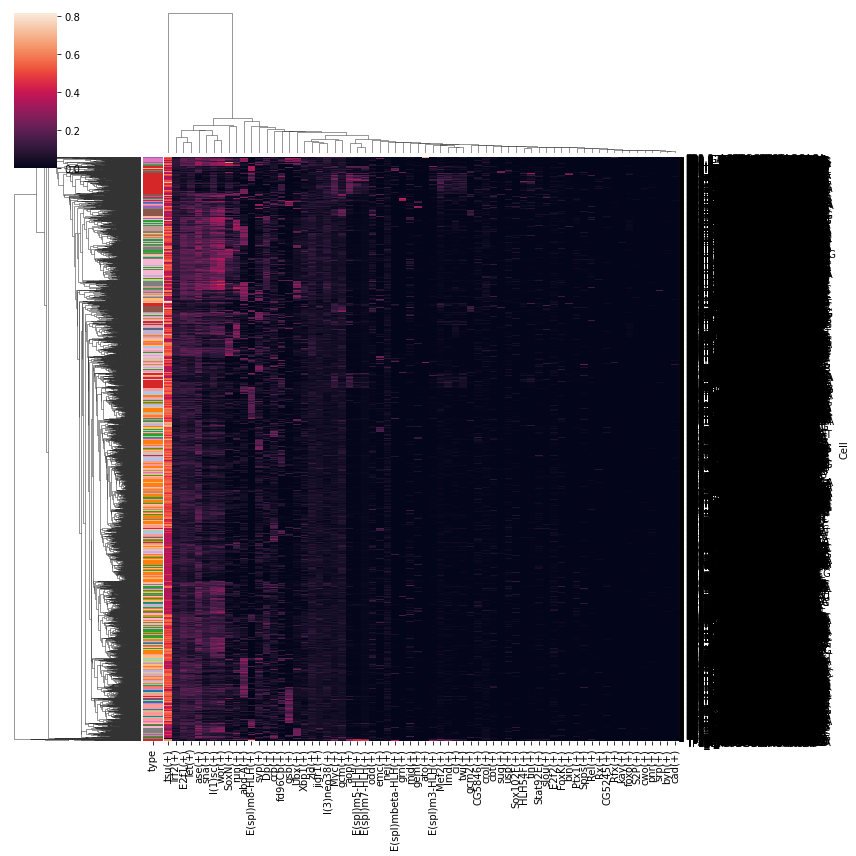

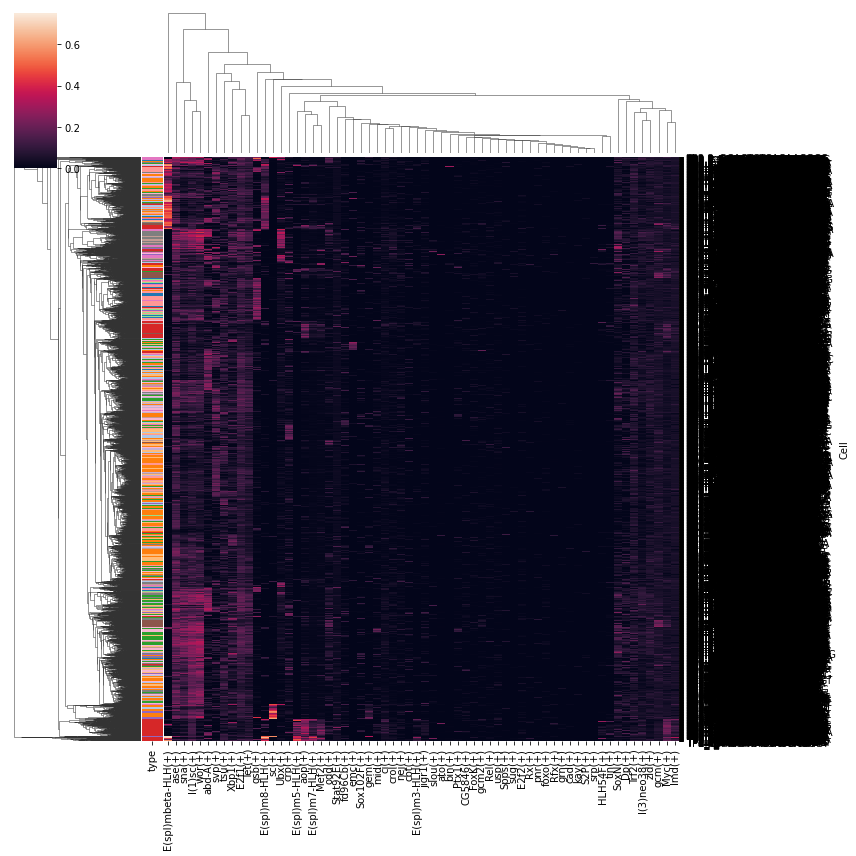

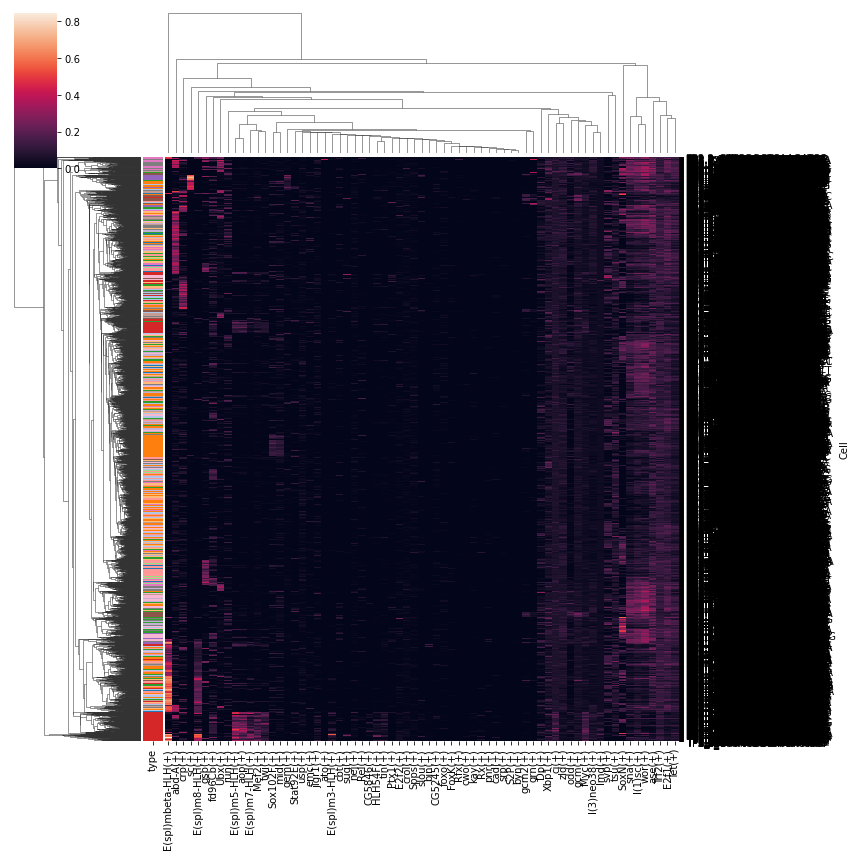

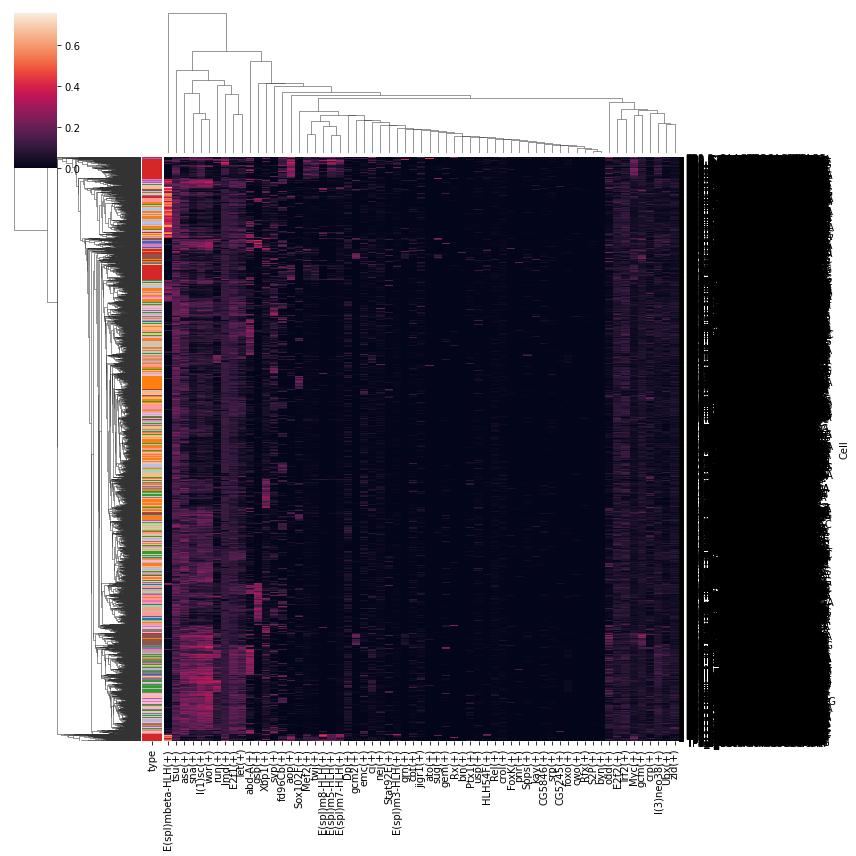

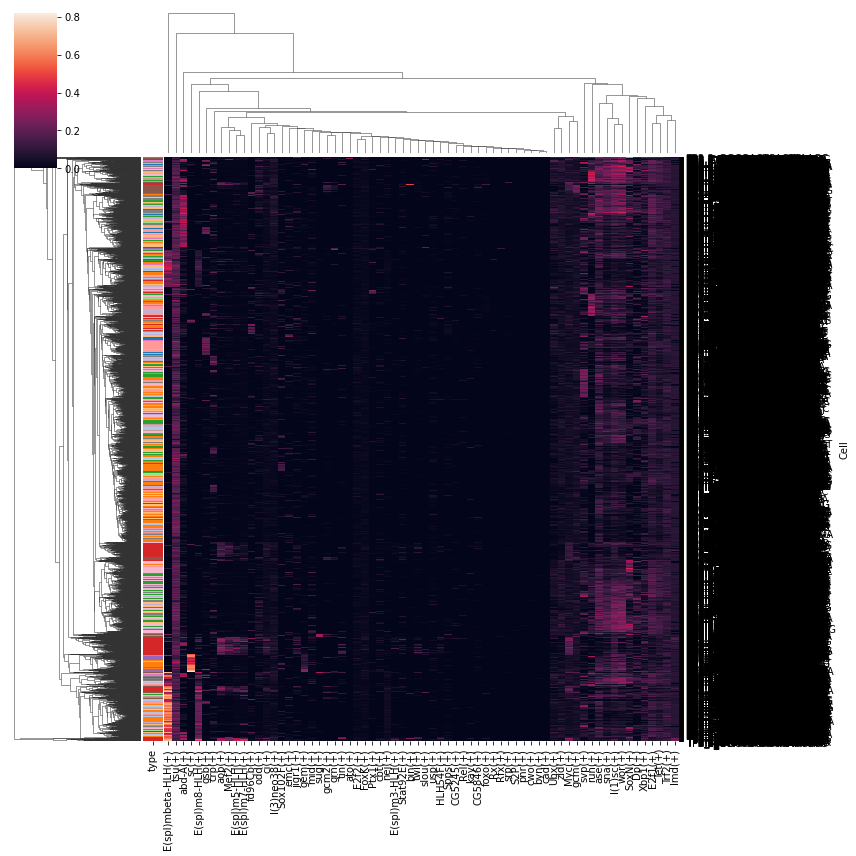

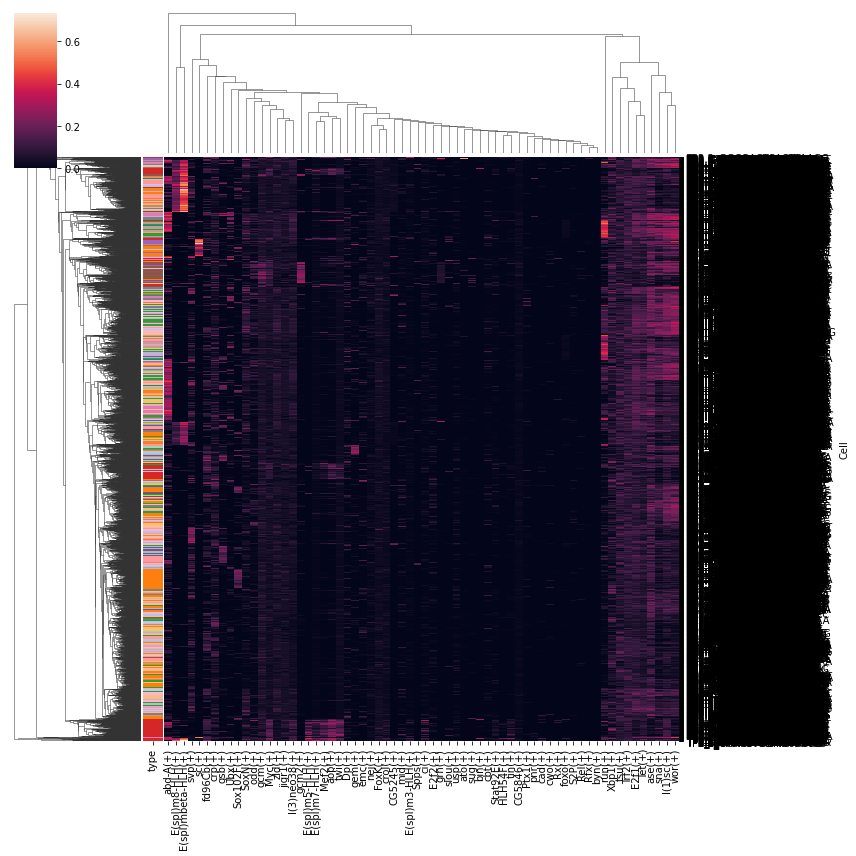

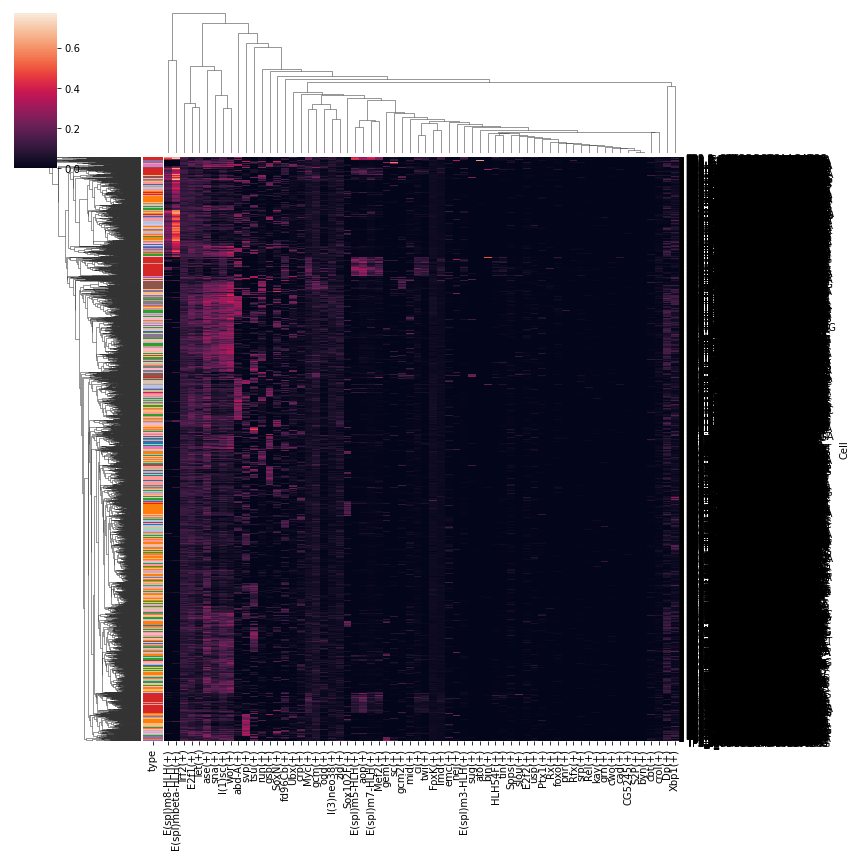

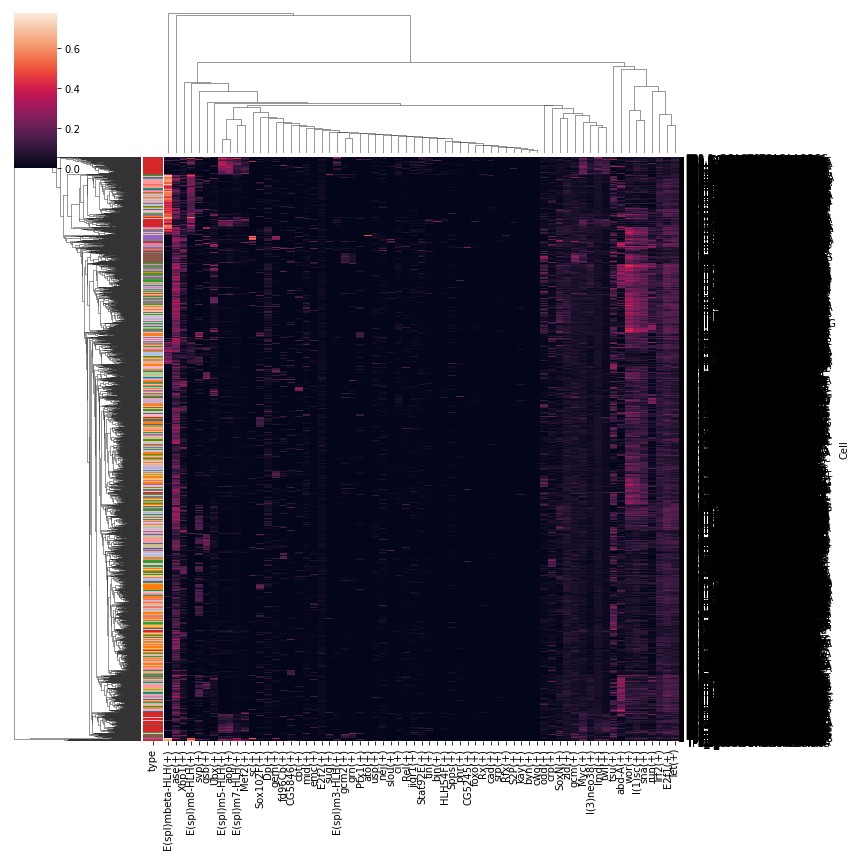

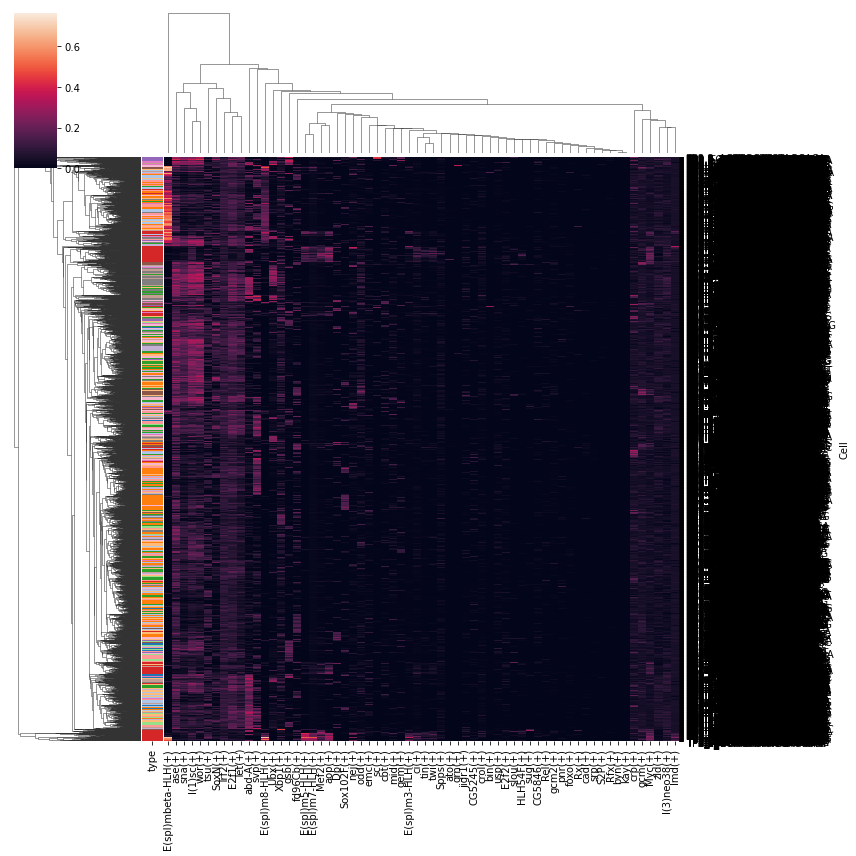

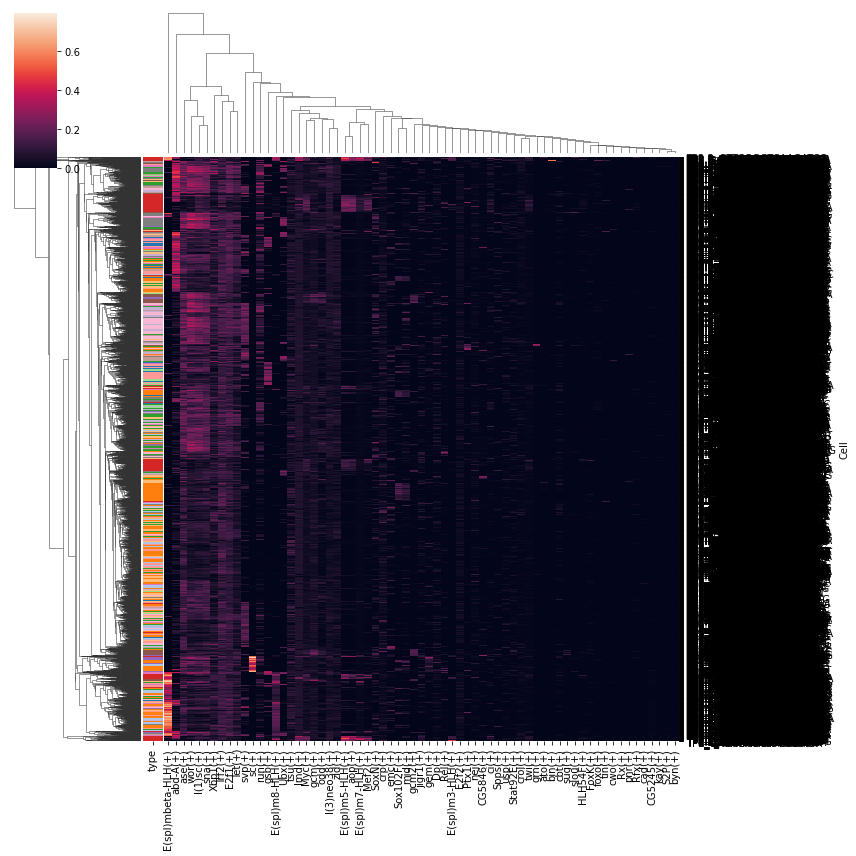

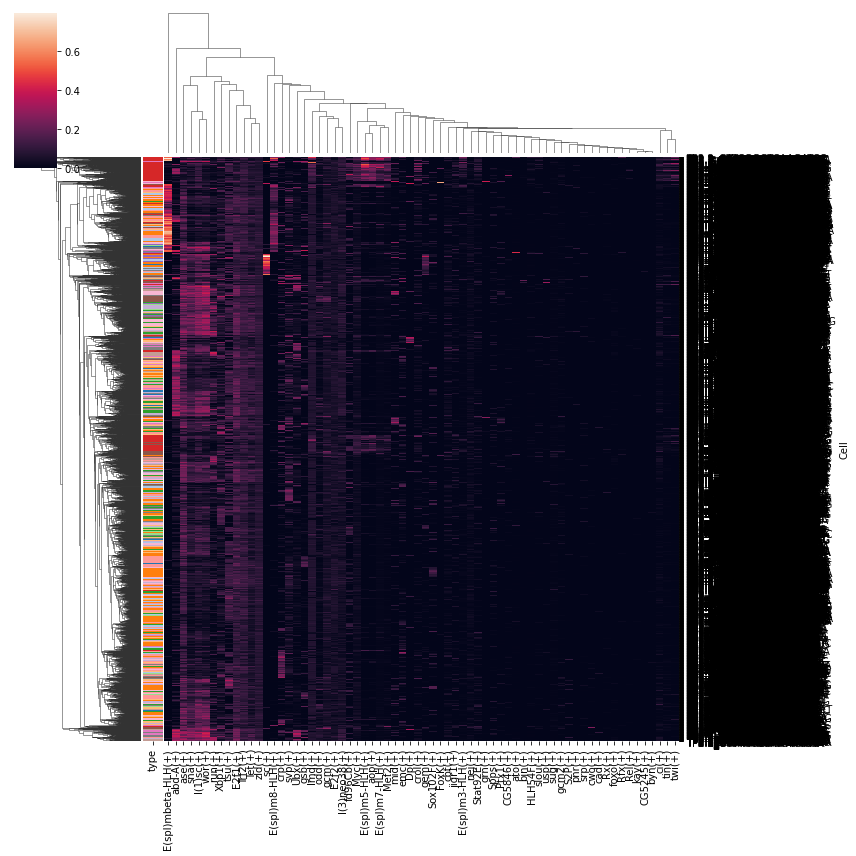

In [51]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

for folder in glob("../results/*/"):
    auc_mtx = pd.read_csv(folder + "AUCell_mat.csv", index_col=0)
    reg_top80 = pd.read_csv(folder + "regulons_top80.csv", index_col=0)
    # keep AUC_mtx TFs that are in reg_top80:

    auc_mtx = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]
    row_colors = auc_mtx.merge(cell_colors, how='left', left_index=True, right_index=True).type
    
    ax= sns.clustermap(auc_mtx, figsize=(12,12),yticklabels=True, xticklabels=True, row_colors=row_colors)
    ax.savefig(folder + "top80_heatmap.png")

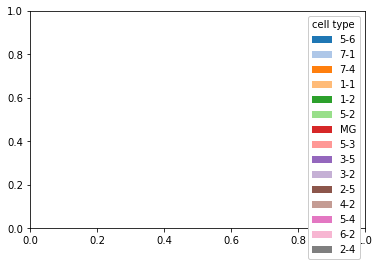

In [56]:
from matplotlib.patches import Patch

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title="cell type", framealpha=1)

### Heatmaps of binarization

In [304]:
# from pyscenic tutorial https://pyscenic.readthedocs.io/en/latest/faq.html 
def plot_binarization(auc_mtx: pd.DataFrame, regulon_name: str, threshold: float, ax=None) -> None:
    """
    Plot the "binarization" process for the given regulon.

    :param auc_mtx: The dataframe with the AUC values for all cells and regulons (n_cells x n_regulons).
    :param regulon_name: The name of the regulon.
    :param bins: The number of bins to use in the AUC histogram.
    :param threshold: The threshold to use for binarization.
    """
    if ax is None:
        ax=plt.gca()
   
    auc_mtx[regulon_name].hist(ax=ax, bins='auto')  # originally bins are chosen to be 200

    ylim = ax.get_ylim()
    ax.plot([threshold]*2, ylim, 'r:')
    ax.set_ylim(ylim)
    # ax.set_xlim(0.12,0.35)
    ax.set_xlabel('AUC')
    ax.set_ylabel('# cells')
    ax.set_title(regulon_name)


In [58]:
from pyscenic.binarization import binarize

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: User

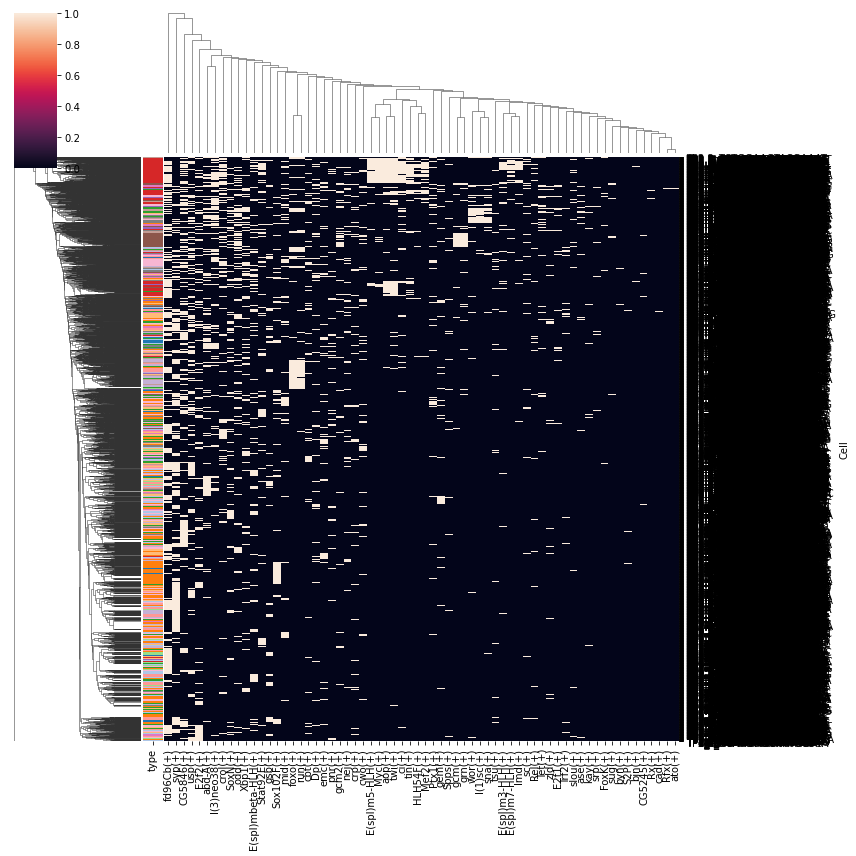

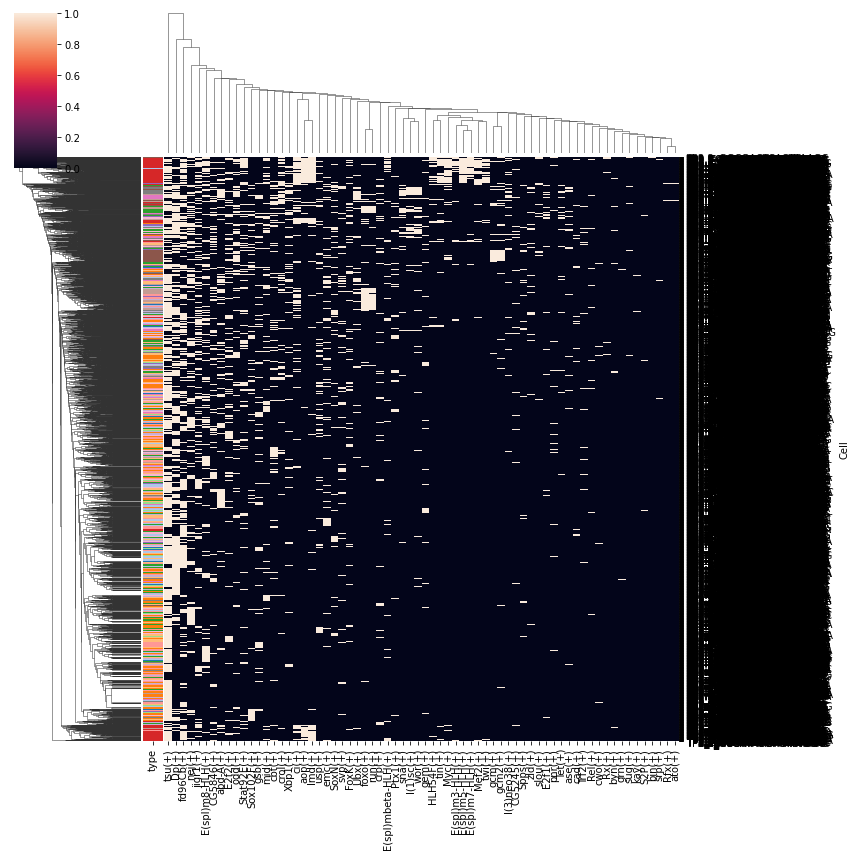

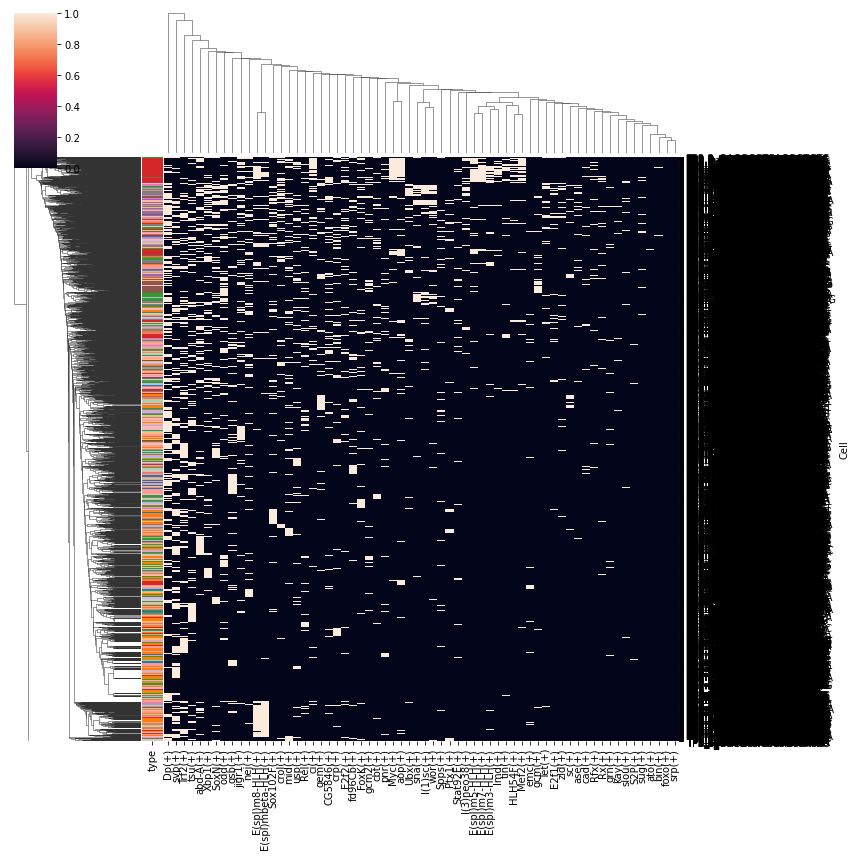

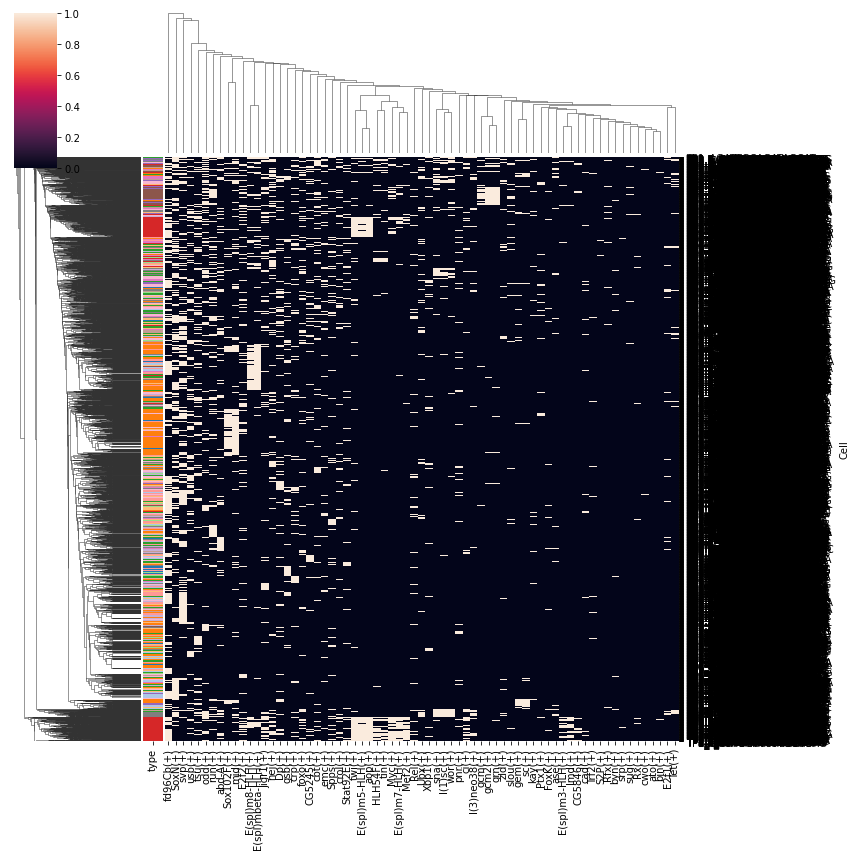

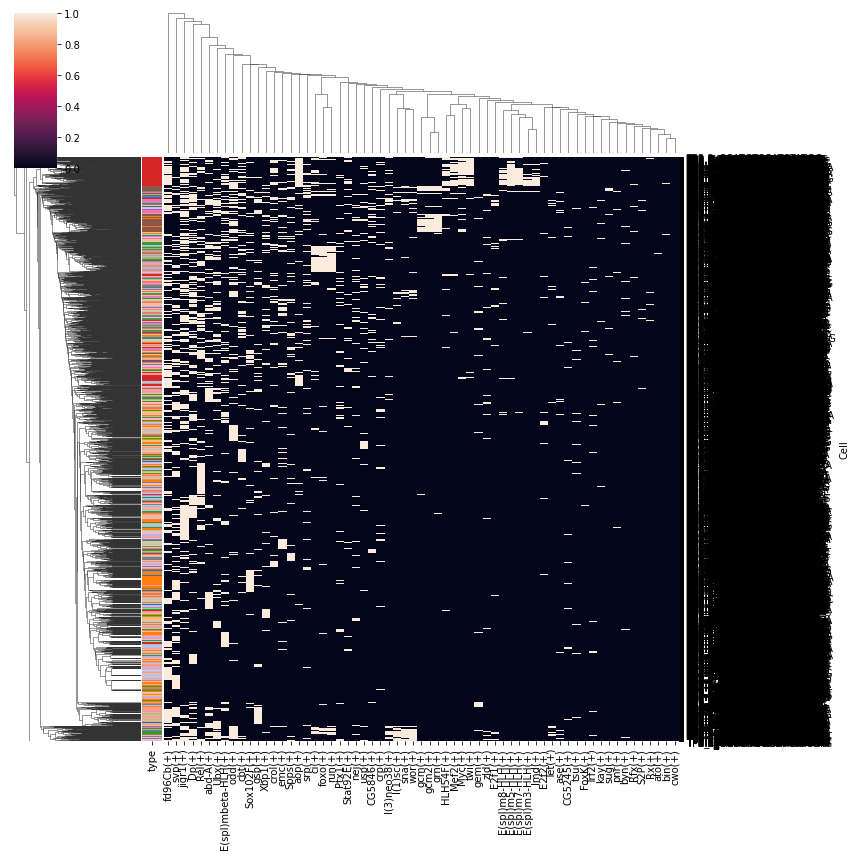

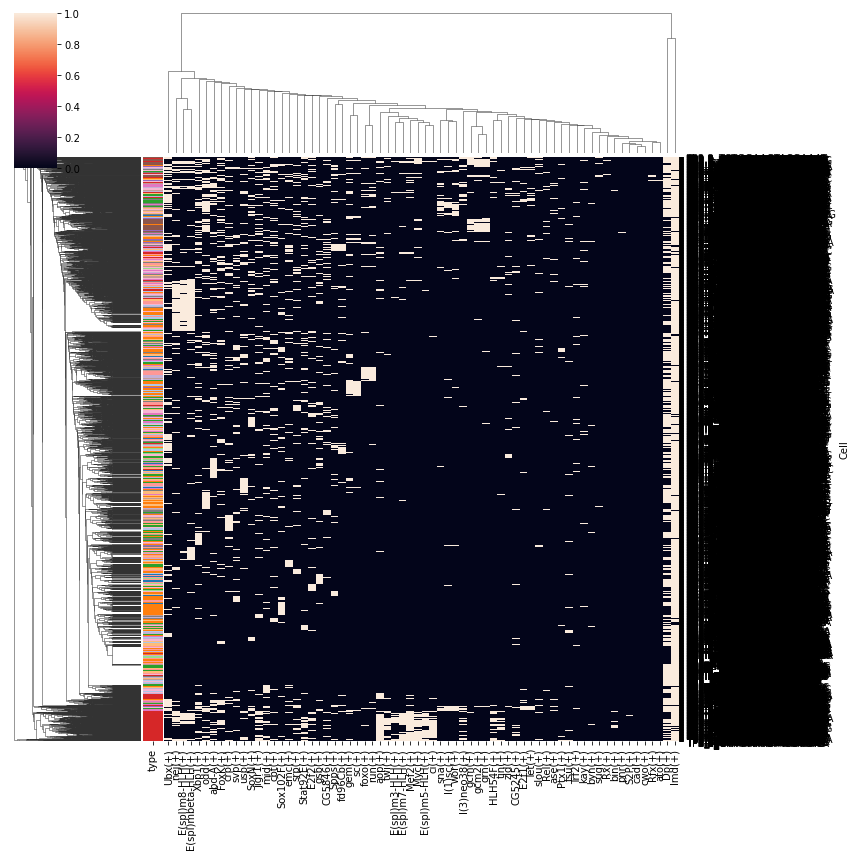

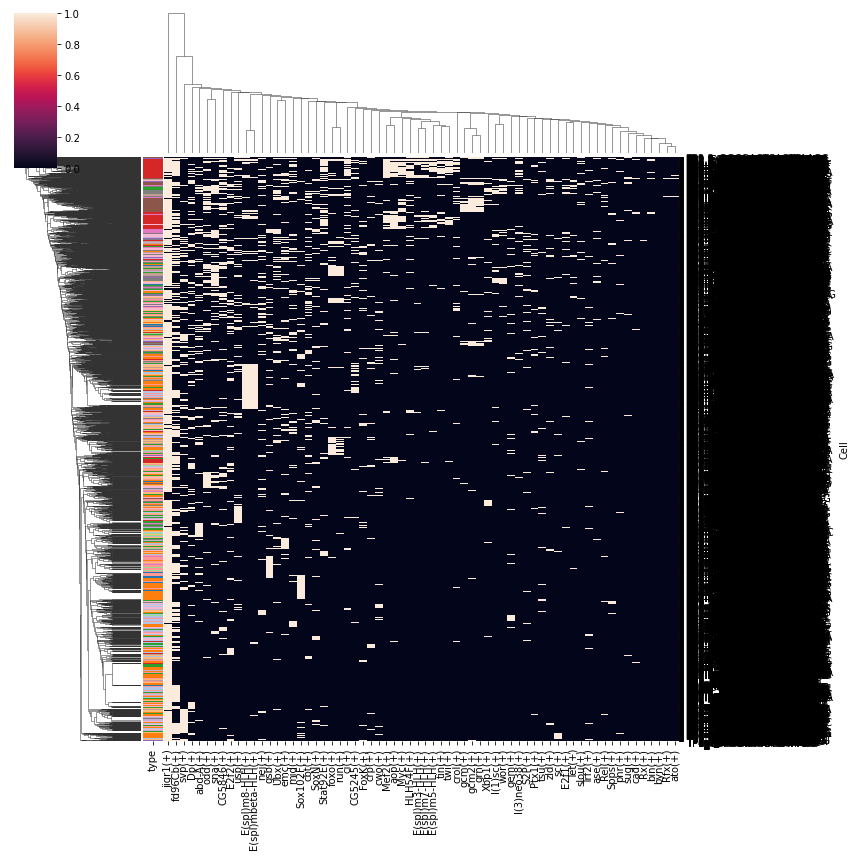

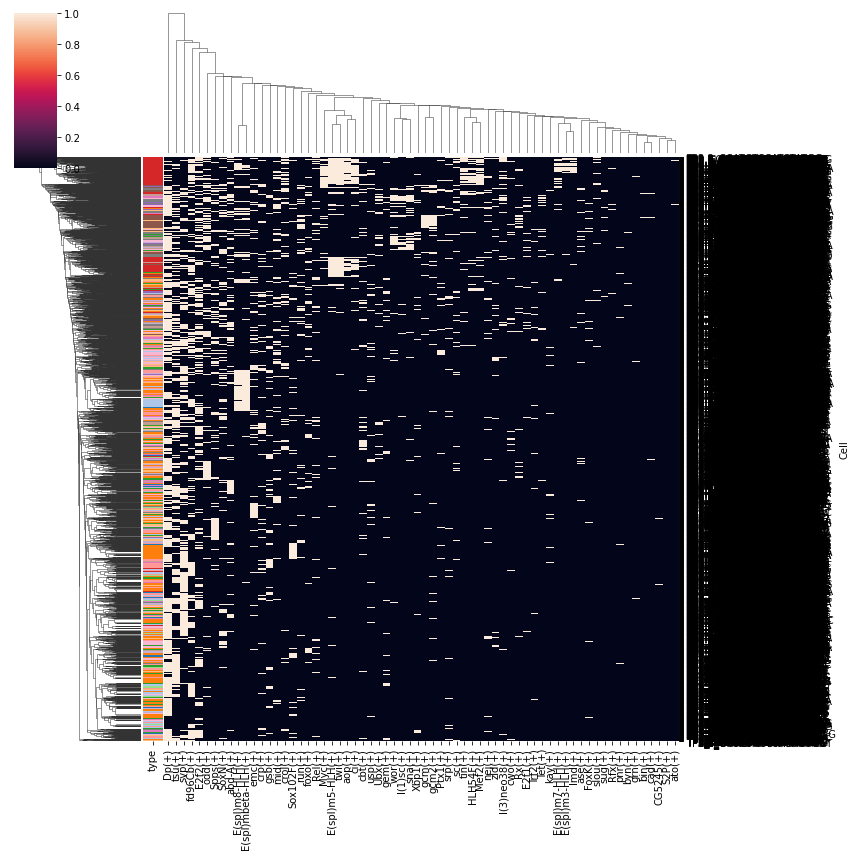

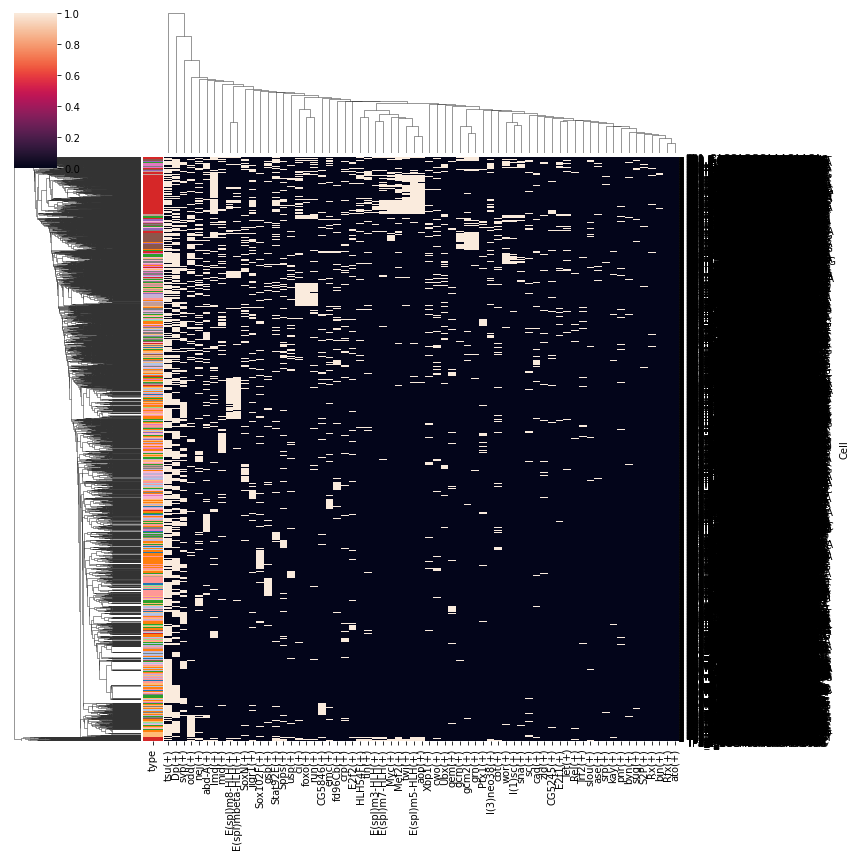

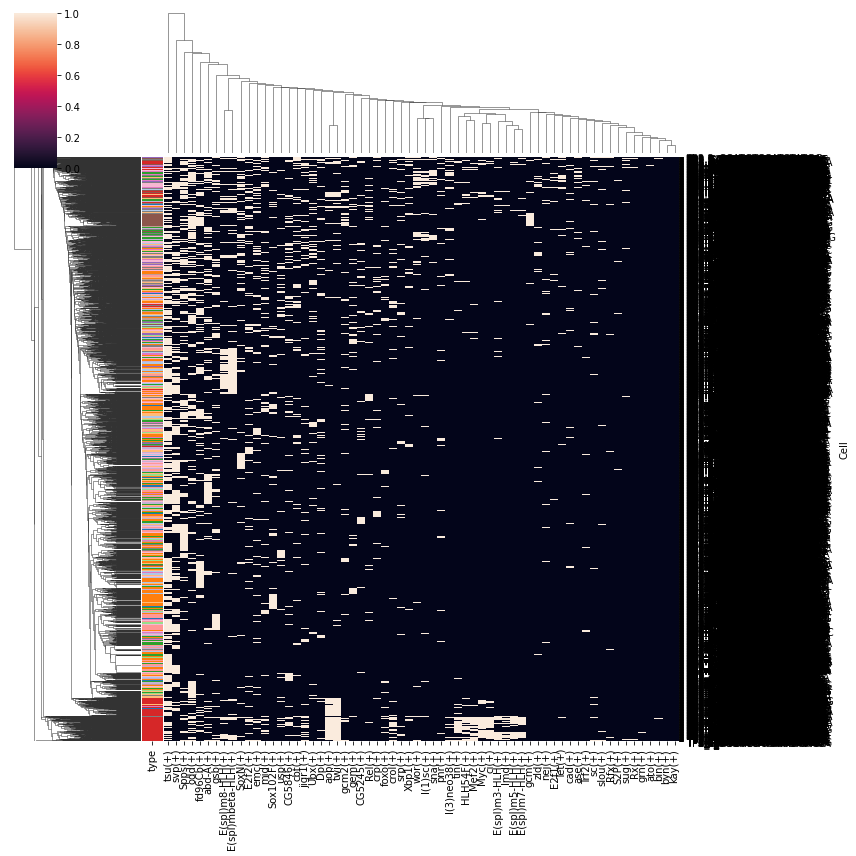

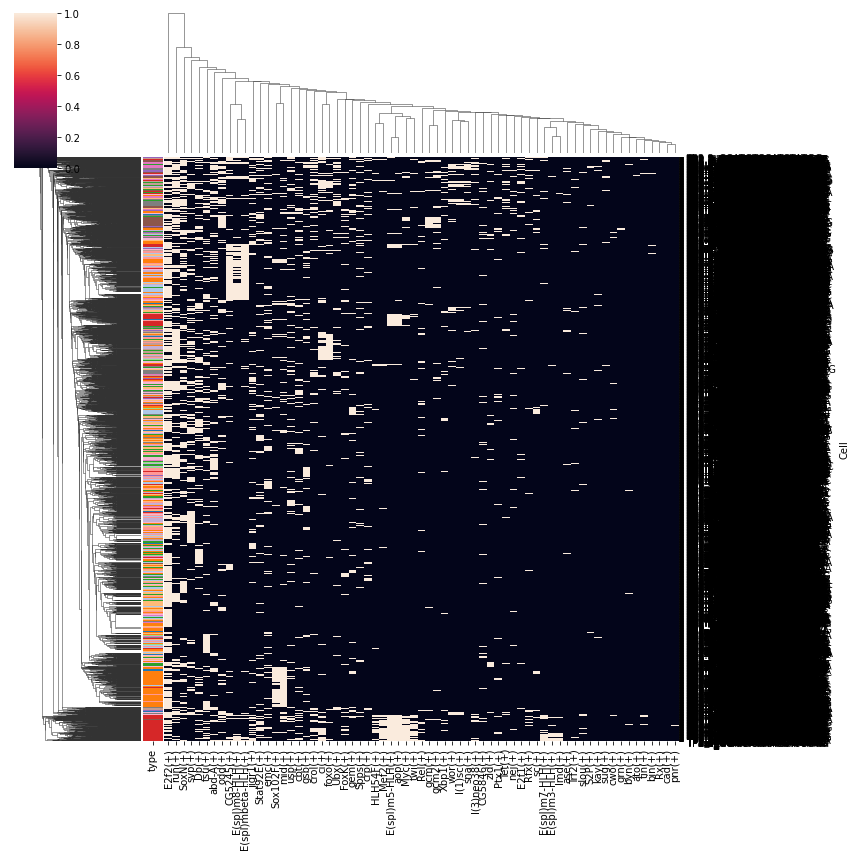

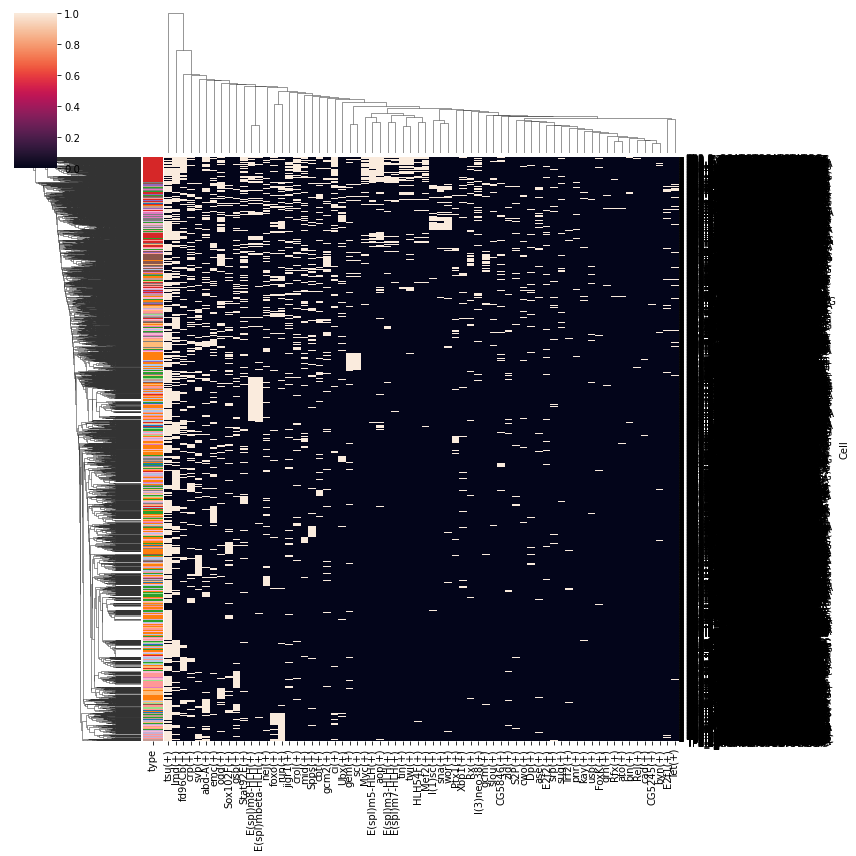

In [77]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

for folder in glob("../results/*/"):
    auc_mtx = pd.read_csv(folder + "AUCell_mat.csv", index_col=0)
    reg_top80 = pd.read_csv(folder + "regulons_top80.csv", index_col=0)
    # keep AUC_mtx TFs that are in reg_top80:

    auc_mtx = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]

    binary = binarize(auc_mtx)
    binary_aucell = binary[0]  # because binarize returns a touple of (df, Series of thresholds)
    row_colors = binary_aucell.merge(cell_colors, how='left', left_index=True, right_index=True).type
    ax = sns.clustermap(binary_aucell, figsize=(12,12),yticklabels=True, xticklabels=True, row_colors=row_colors)
    ax.savefig(folder + "top80_binary_heatmap.png")
    

In [81]:
# lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
# cell_colors = types_df.type.map(lut)
genes_list = ["aop(+)", "HLH54F(+)", "Mef2(+)", "Myc(+)", "twi(+)", "E(spl)m5-HLH(+)", "E(spl)m7-HLH(+)", "E(spl)m3-HLH(+)", "lmd(+)",
              "gcm(+)", "gcm2(+)", "grn(+)",
              "Sox102F(+)"]

for folder in glob("../results/*/"):
    auc_mtx = pd.read_csv(folder + "AUCell_mat.csv", index_col=0)
    reg_top80 = pd.read_csv(folder + "regulons_top80.csv", index_col=0)
    # keep AUC_mtx TFs that are in reg_top80:

    auc_mtx = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]

    binary = binarize(auc_mtx)
    binary_aucell = binary[0]  # because binarize returns a touple of (df, Series of thresholds)
    # row_colors = binary_aucell.merge(cell_colors, how='left', left_index=True, right_index=True).type
    # ax = sns.clustermap(binary_aucell, figsize=(12,12),yticklabels=True, xticklabels=True, row_colors=row_colors)
    # ax.savefig(folder + "top80_binary_heatmap.png")
    for regulon in list(auc_mtx.columns.values): 
        if regulon in genes_list:
            plot_binarization(auc_mtx=auc_mtx, regulon_name=regulon, threshold=binary[1][regulon])
            plt.savefig(f"{folder}regulon.pdf")

KeyError: 'aop'

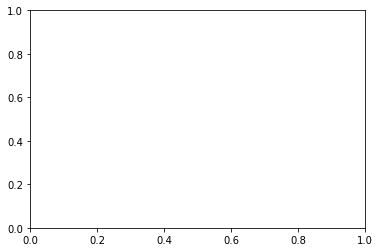

In [322]:
auc_mtx = pd.read_csv("../results/run_01/AUCell_mat.csv", index_col=0)
reg_top80 = pd.read_csv("../results/run_01/regulons_top80.csv", index_col=0)

auc_mtx = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]

binary = binarize(auc_mtx)
binary_aucell = binary[0]
plot_binarization(auc_mtx=auc_mtx, regulon_name="aop", threshold=binary[1]["aop(+)"])

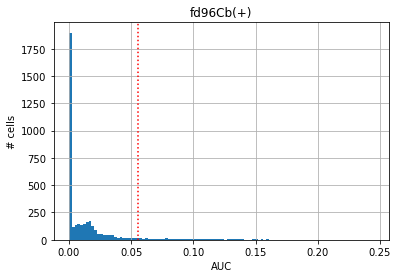

In [305]:
plot_binarization(auc_mtx=auc_mtx, regulon_name="fd96Cb(+)", threshold=binary[1]["fd96Cb(+)"])

In [223]:
import numpy as np

array([[<AxesSubplot:title={'center':'abd-A(+)'}>]], dtype=object)

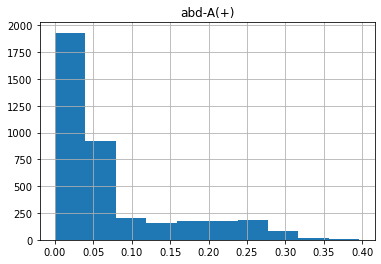

In [230]:
# auc_mtx['Sox102F(+)'].hist(bins=600)
auc_mtx.hist(column='abd-A(+)')


### AUCell heatmaps (of top80% regulons) grouped by cell-types 

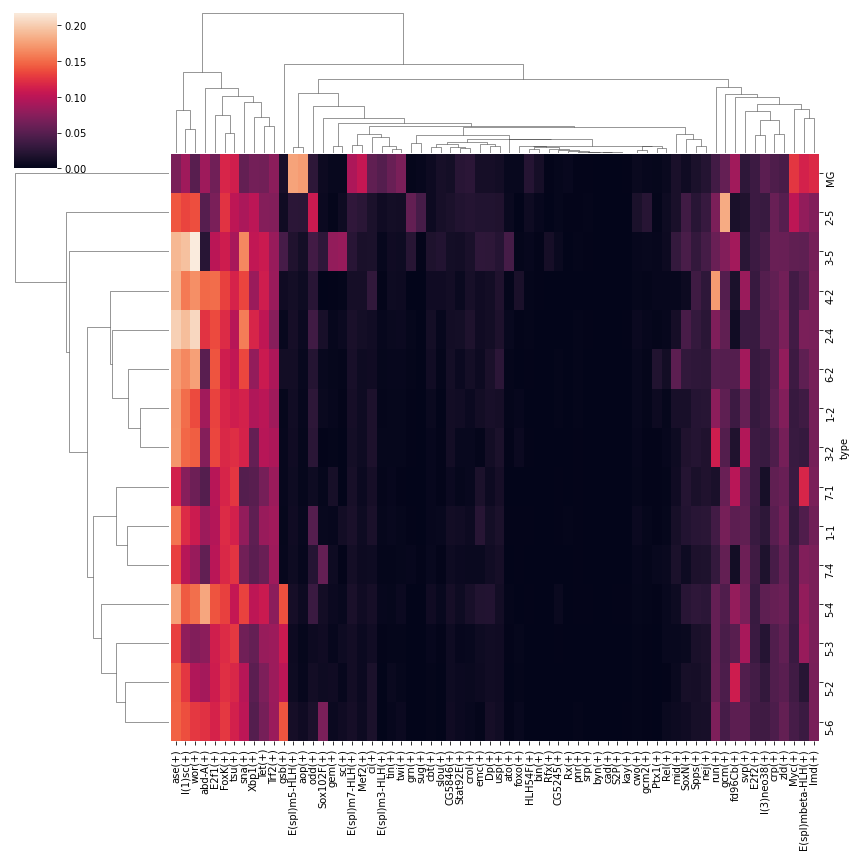

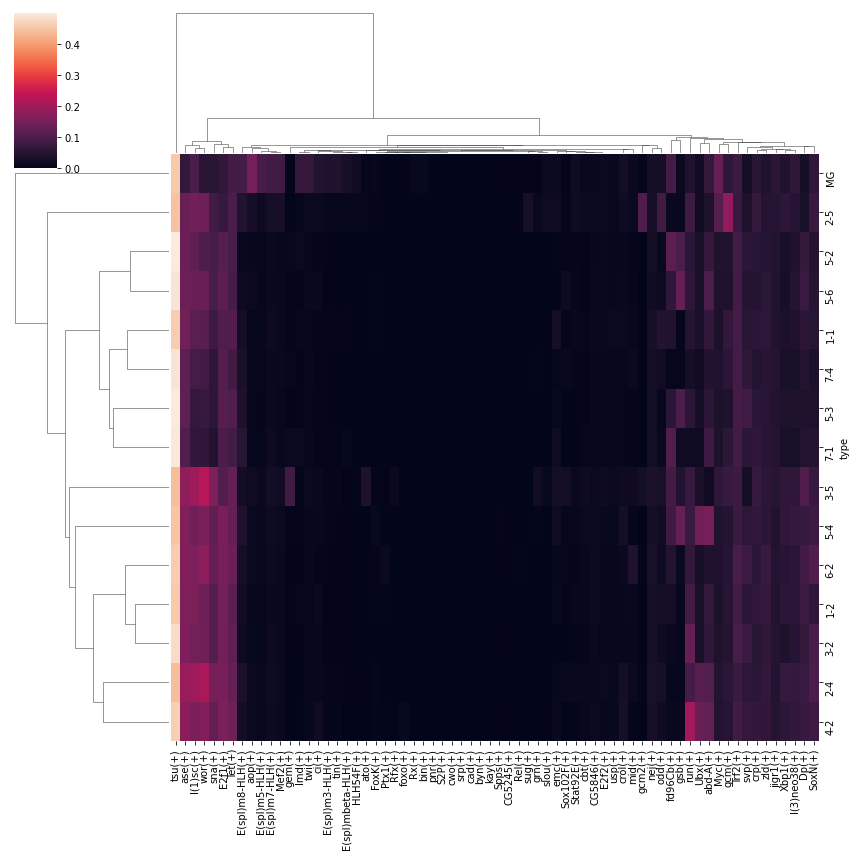

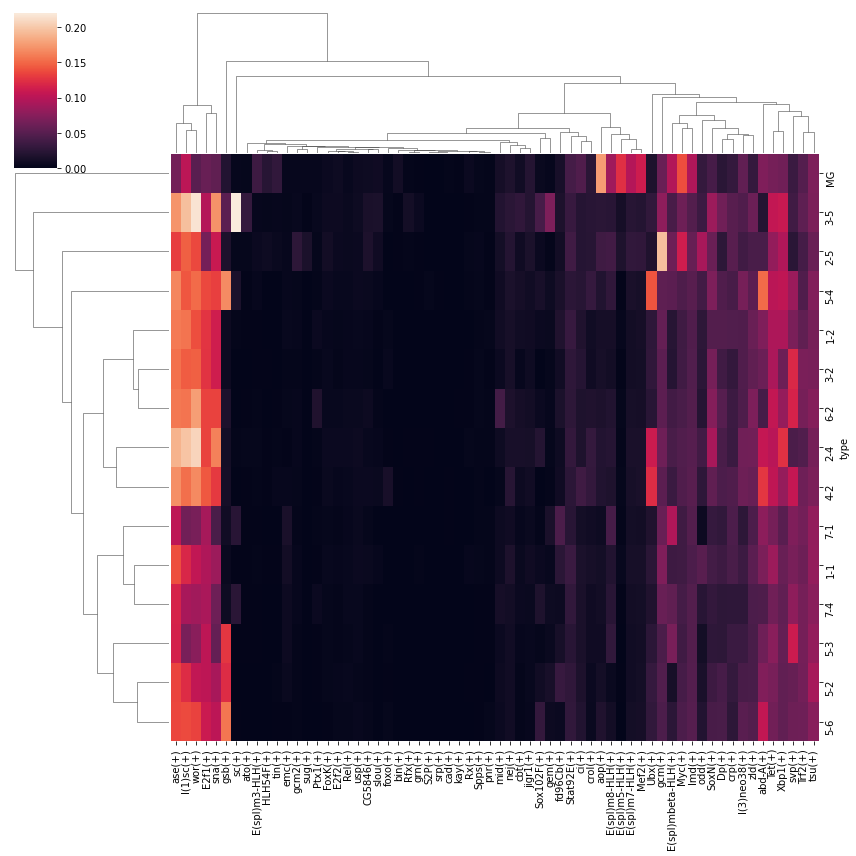

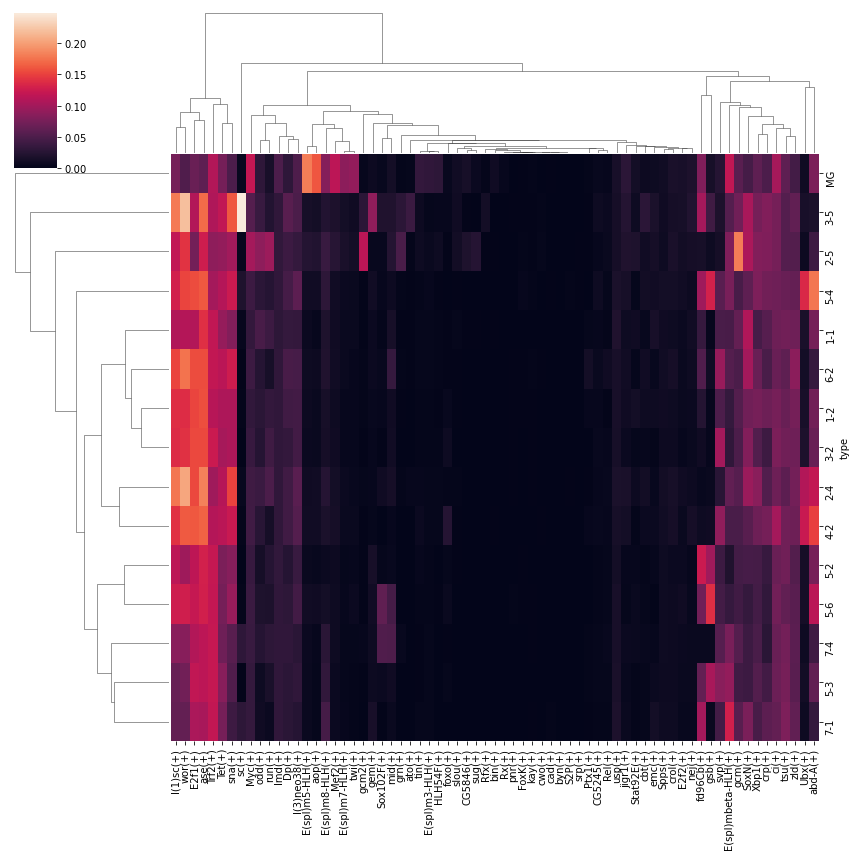

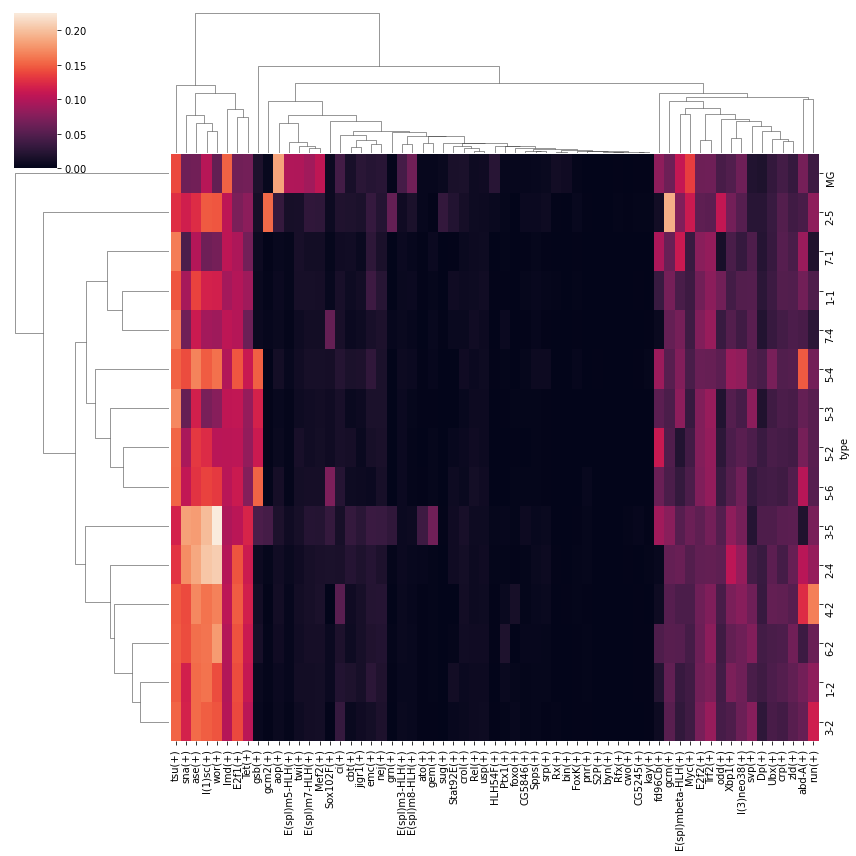

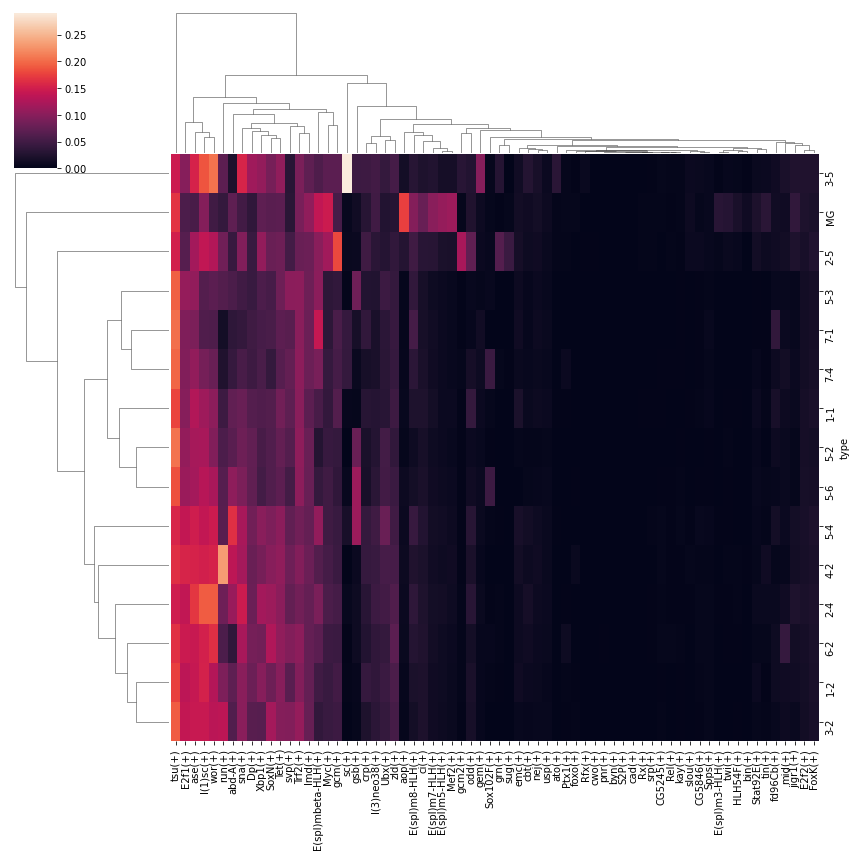

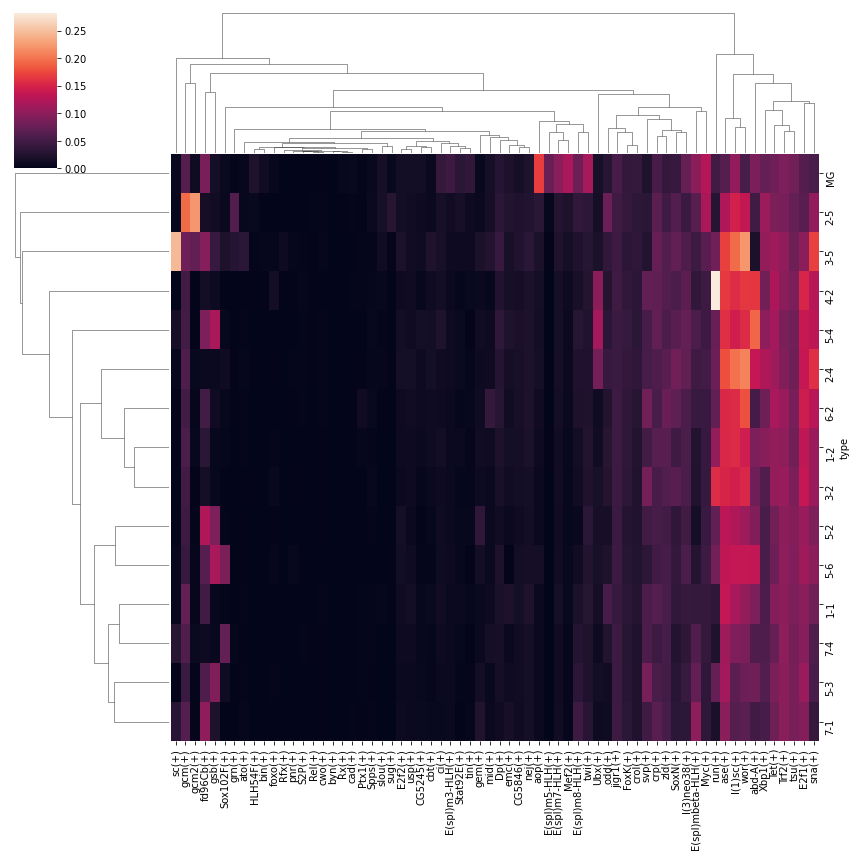

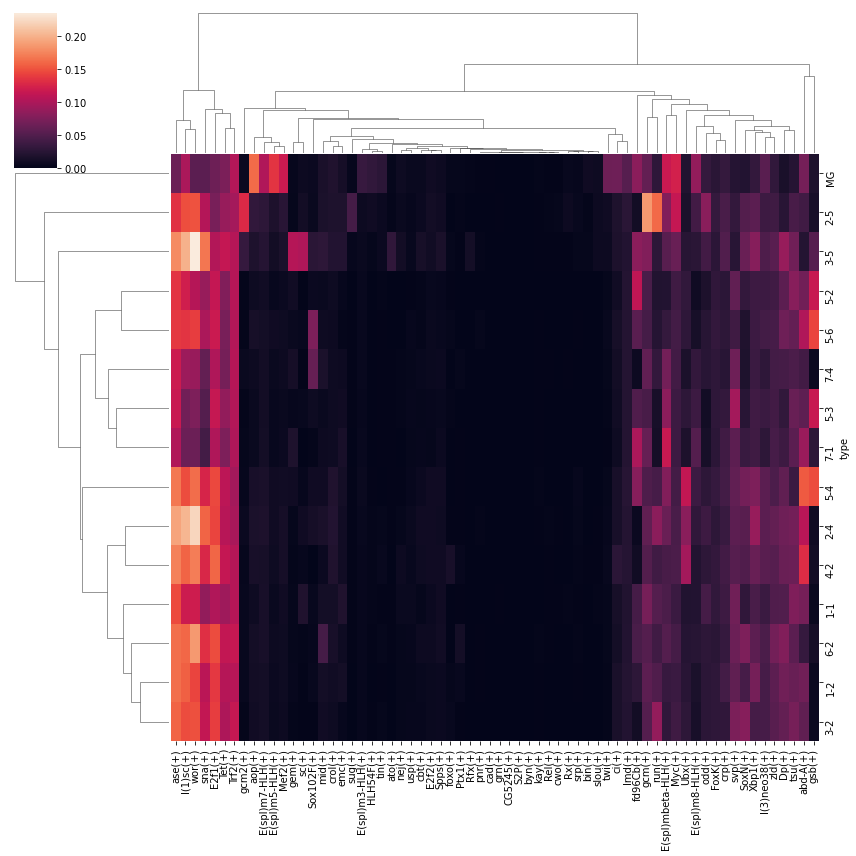

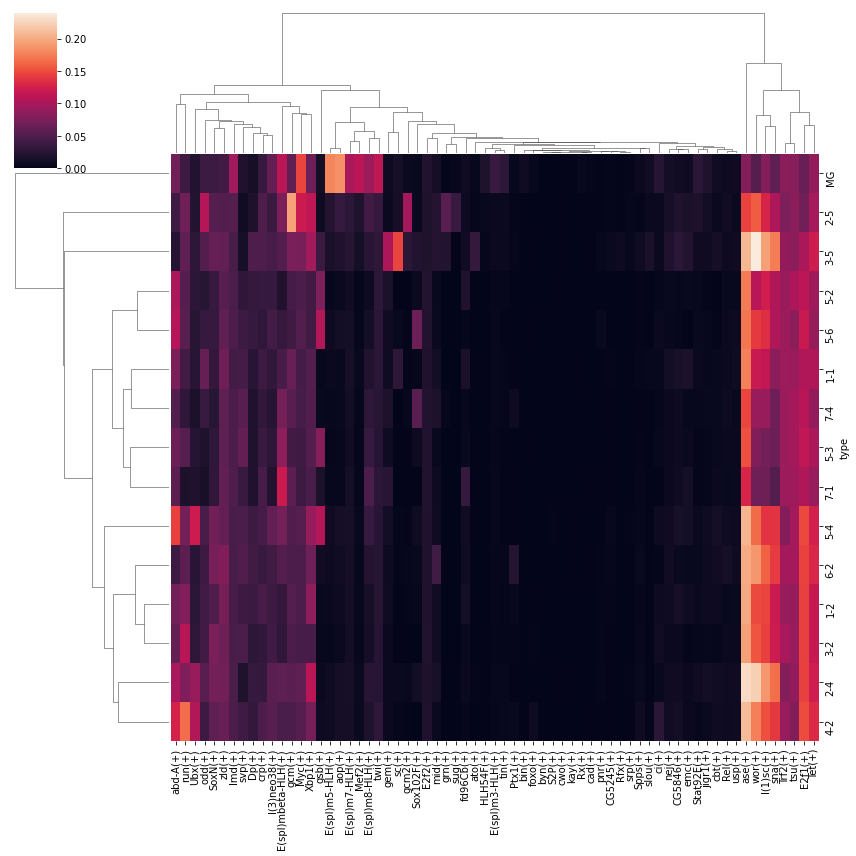

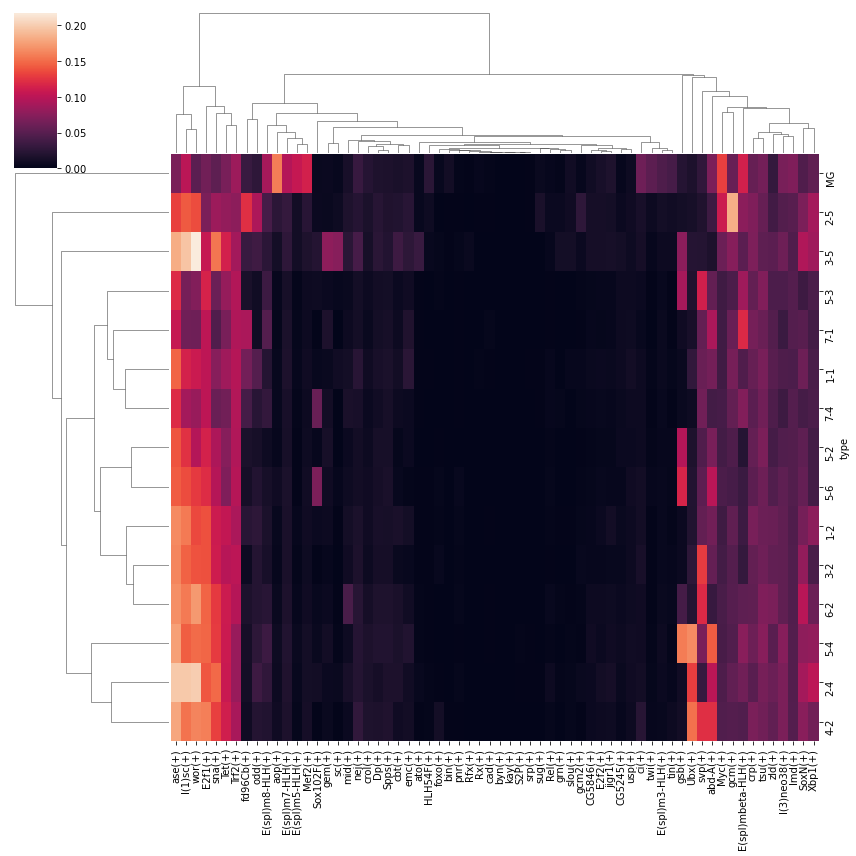

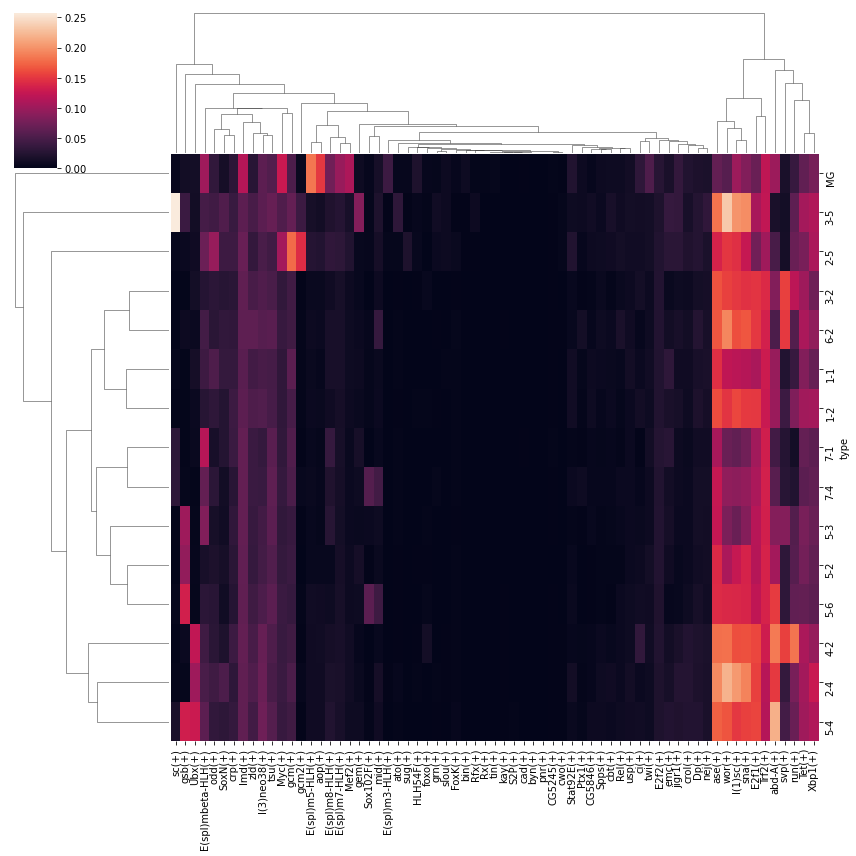

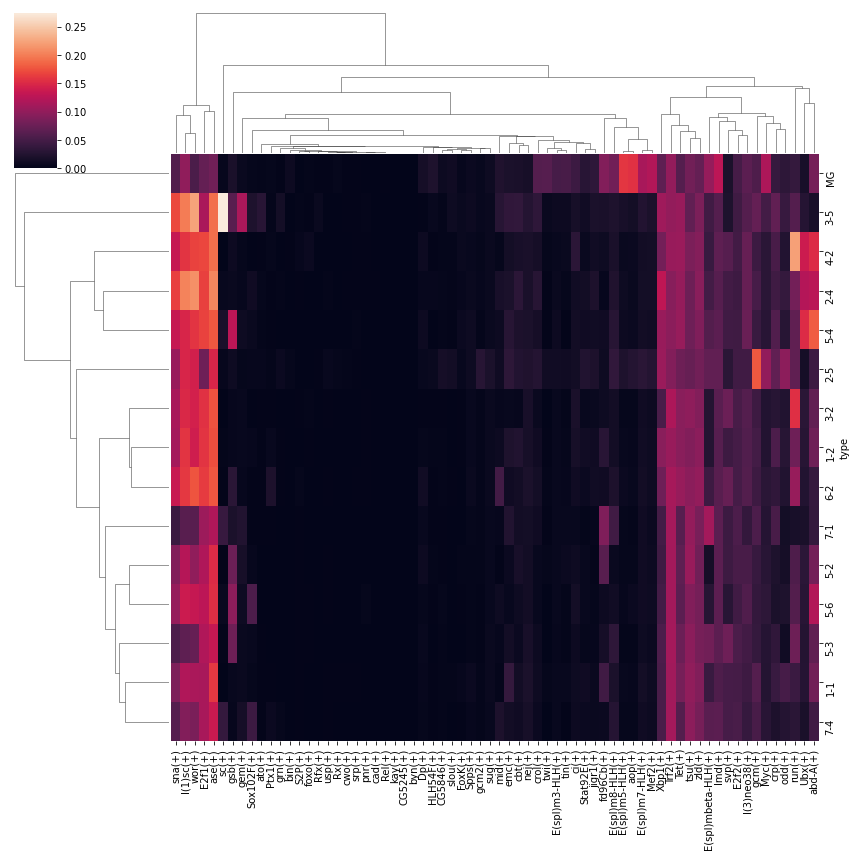

In [61]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

# auc_mtx = pd.read_csv("../results/run_01/top80_heatmap.png", index_col=0)
# types df : cell (index) | type
for folder in glob("../results/*/"):
    auc_mtx = pd.read_csv(folder + "AUCell_mat.csv", index_col=0)
    reg_top80 = pd.read_csv(folder + "regulons_top80.csv", index_col=0)
    # keep AUC_mtx TFs that are in reg_top80:

    auc_mtx = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]
    auc_type = auc_mtx.merge(types_df, how='left', left_index=True, right_index=True)
    
    auc_type = auc_type.groupby("type").mean()
    
    ax = sns.clustermap(auc_type, figsize=(12,12),yticklabels=True, xticklabels=True)
    ax.savefig(folder + "top80_heatmap_type.png")

#### Cell type count

In [ ]:
types_df

<AxesSubplot:>

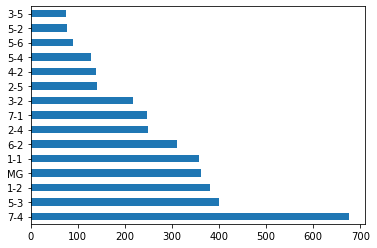

In [75]:
types_df.type.value_counts().plot(kind='barh')

### regulons AUC distribution

In [78]:
import matplotlib.pyplot as plt

def plot_binarization(auc_mtx: pd.DataFrame, regulon_name: str, threshold: float, ax=None) -> None:
    """
    Plot the "binarization" process for the given regulon.

    :param auc_mtx: The dataframe with the AUC values for all cells and regulons (n_cells x n_regulons).
    :param regulon_name: The name of the regulon.
    :param bins: The number of bins to use in the AUC histogram.
    :param threshold: The threshold to use for binarization.
    """
    if ax is None:
        ax=plt.gca()
   
    auc_mtx[regulon_name].hist(ax=ax, bins='auto')  # originally bins are chosen to be 200

    ylim = ax.get_ylim()
    ax.plot([threshold]*2, ylim, 'r:')
    ax.set_ylim(ylim)
    ax.set_xlabel('AUC')
    ax.set_ylabel('# cells')
    ax.set_title(regulon_name)

In [79]:
from pyscenic.binarization import binarize

In [80]:
mtx = pd.read_csv("../results/run_01/AUCell_mat.csv")
binary_aucell = binarize(mtx)
plot_binarization(auc_mtx=mtx, regulon_name='aop', threshold=binary_aucell[1]['aop'])

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U22'), dtype('<U20')) -> None

In [306]:
expression_mat = pd.read_csv("../data/expression_mat.csv")

In [307]:
expression_mat

Unnamed: 0    a     abd-A  Abd-B  Abl       abo        ac  \
0       TP1_AACTCAGGTAAATACG  0.0  0.000000    0.0  0.0  0.466624  0.000000   
1       TP1_TCACGAATCTATCGCC  0.0  1.053208    0.0  0.0  0.000000  0.483831   
2       TP1_TACGGTACAATAGAGT  0.0  0.813928    0.0  0.0  0.000000  0.000000   
3       TP1_CAACTAGAGAGACGAA  0.0  0.000000    0.0  0.0  0.000000  0.888313   
4       TP1_GCGCCAAAGTCGATAA  0.0  0.000000    0.0  0.0  0.000000  0.000000   
...                      ...  ...       ...    ...  ...       ...       ...   
3850  TP2.2_AACACGTCATTCACTT  0.0  0.000000    0.0  0.0  0.000000  0.000000   
3851  TP2.2_TCTTTCCGTACCGTTA  0.0  0.000000    0.0  0.0  0.000000  0.000000   
3852  TP2.2_GATTCAGCACACGCTG  0.0  2.470005    0.0  0.0  0.000000  1.858055   
3853  TP2.2_TGAGCATGTGATGTCT  0.0  0.000000    0.0  0.0  0.000000  0.000000   
3854  TP2.2_GACGGCTCAAAGGTGC  0.0  0.000000    0.0  0.0  0.000000  0.000000   

      acj6  Acph-1     Act5C  ...  lncRNA:CR43716  lncRNA:CR44997  \
0      0.0     0.0  2.764117  ...               0               0   
1      0.0     0.0  2.879282  ...               0               0   
2      0.0     0.0  2.458085  ...               0               0   
3      0.0     0.0  2.728522  ...               0               0   
4      0.0     0.0  3.294131  ...               0               0   
...    ...     ...       ...  ...             ...             ...   
3850   0.0     0.0  0.000000  ...               0               0   
3851   0.0     0.0  3.506908  ...               0               0   
3852   0.0     0.0  3.119940  ...               0               0   
3853   0.0     0.0  1.854410  ...               0               0   
3854   0.0     0.0  3.107610  ...               0               0   

      asRNA:CR45151  lncRNA:CR45310  lncRNA:CR45425  asRNA:CR45822  \
0               0.0               0             0.0            0.0   
1               0.0               0             0.0            0.0   
2               0.0               0             0.0            0.0   
3               0.0               0             0.0            0.0   
4               0.0               0             0.0            0.0   
...             ...             ...             ...            ...   
3850            0.0               0             0.0            0.0   
3851            0.0               0             0.0            0.0   
3852            0.0               0             0.0            0.0   
3853            0.0               0             0.0            0.0   
3854            0.0               0             0.0            0.0   

      asRNA:CR45891  lncRNA:CR45961  lncRNA:CR46032  lncRNA:CR46119  
0               0.0             0.0               0             0.0  
1               0.0             0.0               0             0.0  
2               0.0             0.0               0             0.0  
3               0.0             0.0               0             0.0  
4               0.0             0.0               0             0.0  
...             ...             ...             ...             ...  
3850            0.0             0.0               0             0.0  
3851            0.0             0.0               0             0.0  
3852            0.0             0.0               0             0.0  
3853            0.0             0.0               0             0.0  
3854            0.0             0.0               0             0.0  

[3855 rows x 9752 columns]

## What about negative correlation??

In [318]:
from arboreto.algo import grnboost2
from pyscenic.utils import modules_from_adjacencies
from pyscenic.prune import prune2df, df2regulons

In [319]:
help(modules_from_adjacencies)
# Param "keep only activating" can be set to false!

Help on function modules_from_adjacencies in module pyscenic.utils:

modules_from_adjacencies(adjacencies: pandas.core.frame.DataFrame, ex_mtx: pandas.core.frame.DataFrame, thresholds=(0.75, 0.9), top_n_targets=(50,), top_n_regulators=(5, 10, 50), min_genes=20, absolute_thresholds=False, rho_dichotomize=True, keep_only_activating=True, rho_threshold=0.03, rho_mask_dropouts=False) -> Sequence[ctxcore.genesig.Regulon]
    Create modules from a dataframe containing weighted adjacencies between a TF and its target genes.
    
    :param adjacencies: The dataframe with the TF-target links. This dataframe should have the following columns:
        :py:const:`pyscenic.utils.COLUMN_NAME_TF`, :py:const:`pyscenic.utils.COLUMN_NAME_TARGET` and :py:const:`pyscenic.utils.COLUMN_NAME_WEIGHT` .
    :param ex_mtx: The expression matrix (n_cells x n_genes).
    :param thresholds: the first method to create the TF-modules based on the best targets for each transcription factor.
    :param top_n_targets: